<a href="https://colab.research.google.com/github/chethana613/document_clustering/blob/main/Data_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=dcbbd96df951f8025ce35ab3eb5c15e06c921ae514ba5e853ea07827a2c604d2
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups

#Here we are fetching the raw data from the 20newsgroup corpora. If no params are given, default shuffle is True.
raw_dataset = fetch_20newsgroups()
#print(raw_dataset)
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20


# **Data Cleaning**

In [ ]:
#Subset(all) includes all the training and test set data.
#Filtering out the content to analyze the document
# shuffle=False to load the data in the order rather than loading in random order
# loading only useful data and removing un-necessary header etc..
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target #Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


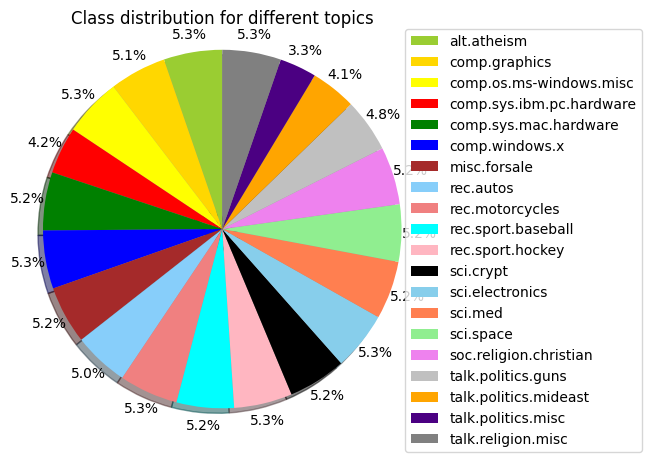

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts, autotexts = plt.pie(val, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2, autopct='%1.1f%%')

plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')

# Displaying numbers on pie chart slices
for autotext in autotexts:
    autotext.set_color('black')

plt.show()


In [ ]:
# First 2 documents
for i in range(2):
    doc = corpus[i]
    category = dataset.target_names[gnd_labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

# Tokenization

In [ ]:
# perform more Pre-processing steps
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

# Build Vocabulary

In [ ]:
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])

18846
['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


# Training Word2Vec

In [ ]:
from gensim.models import word2vec #Library
from sklearn.neighbors import KDTree #For KNN
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
import time
import pandas as pd


In [ ]:
# train the Word2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
# Dimensionality of the hidden layer representation
num_features = 100
# Minimum word count to keep a word in the vocabulary
min_word_count = 20
# Context window size (on each side)- Moderate context window
context = 5
# Downsample setting for frequent words
#Used to reduce the influence of very frequent words during training. It helps to speed up training and improve the quality of word vectors by mitigating the dominance of highly frequent words that may not carry as much semantic meaning.
downsampling = 1e-3

# Initialize and train the model.
print("Training model...");
w2v_model = word2vec.Word2Vec(Vocab_v1, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)
# calling init_sims to make the model more memory efficient by normalizing the vectors in-place.
w2v_model.init_sims(replace=True);
# Save the model
model_name = "model_full_20newsGroup";
w2v_model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

Training model...


Total time: 15.030519485473633 secs


In [ ]:
word_vectors = w2v_model.wv.vectors
print(word_vectors[0].shape)
# print word vector for the first word: 100-element vector with values
word_vectors[0]

(100,)


array([-0.07713592, -0.06851114, -0.00101759,  0.04766719, -0.11223381,
        0.06907792,  0.05060047, -0.06200478, -0.09775631, -0.02547326,
        0.10107511,  0.05778822, -0.18838455,  0.05736216,  0.07854421,
        0.11932509,  0.00719952,  0.17417702, -0.01236615, -0.1092501 ,
        0.10353169, -0.00297558,  0.20298792,  0.08943634,  0.14633143,
       -0.00050103, -0.05705997,  0.11003208, -0.02505437, -0.02305559,
       -0.08712989, -0.05882388,  0.28176558, -0.19439662, -0.00242255,
       -0.04939255,  0.01388253,  0.02341365,  0.11389965,  0.05304721,
       -0.12253942, -0.05533599,  0.00160419,  0.13044102,  0.03298609,
       -0.11015293,  0.01305429,  0.12521012,  0.01658577,  0.07902712,
       -0.01377052,  0.09705316,  0.02485126,  0.14413463,  0.19396816,
       -0.04639821,  0.1380053 , -0.11170062,  0.05355965,  0.04536377,
       -0.06302679, -0.0298161 ,  0.14291736, -0.09566583, -0.04216914,
       -0.01553909,  0.09752043,  0.26522392,  0.11318522,  0.03

In [ ]:
# print length of word vectors
len(word_vectors)

11595

# K Means

In [ ]:
# cluster the words using KMeans
num_clusters = 20 #20 topics
# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans(n_clusters = num_clusters)
clusters = kmeans_clustering.fit_predict(word_vectors)
centers = kmeans_clustering.cluster_centers_
centroid_map = dict(zip(w2v_model.wv.index_to_key, clusters))

In [ ]:
# get words in each cluster that are closest to the cluster center
# initialize a KDTree on the word vectors, and query it for the Top K words on each cluster center.
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

In [ ]:
# get the top words and print the first 2 in each cluster:
top_words = get_top_words(w2v_model.wv.index_to_key, 5000, centers, word_vectors)
top_words[:5]

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19
1,sponsored,precisely,invaded,mathematica,rv,gap,intervention,har,throttle,microwave,beaten,praying,25mhz,initialization,corrections,insulting,coordinate,goaltender,anymore,steven
2,oregon,ignoring,prisoners,ghostscript,6w,lightly,gov't,nyr,drain,temperatures,clothes,preached,512k,allocate,consult,sadly,low-cost,cardinals,hmmm,______________________________________________...
3,pennsylvania,inherently,terror,pexlib,i0,nail,courts,ott,gears,gravitational,stole,gifts,040,parameter,summary,notions,operators,b's,besides,moore
4,massachusetts,emotional,perpetrated,sun4,d4,junction,pursue,176,pulling,fraction,zinaida,sodom,accelerator,routine,additions,engaging,mechanisms,twins,bother,carleton
5,upi,difficulty,argentine,implements,h6,boxer,involvement,258,bolt,planet's,wound,messenger,connecting,selecting,faqs,advocating,procedures,giants,mess,gibson


In [ ]:
# Create a word cloud with the words of a cluster and print and save them.
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

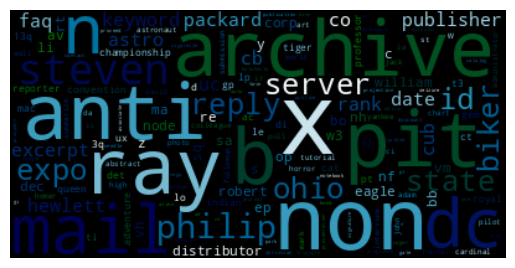

In [ ]:
# call on each cluster, and pass in a different color scheme in each iteration to distinguish them.
from wordcloud import WordCloud
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(0, 20):
    col = next(cmaps)
    display_cloud(i, col)

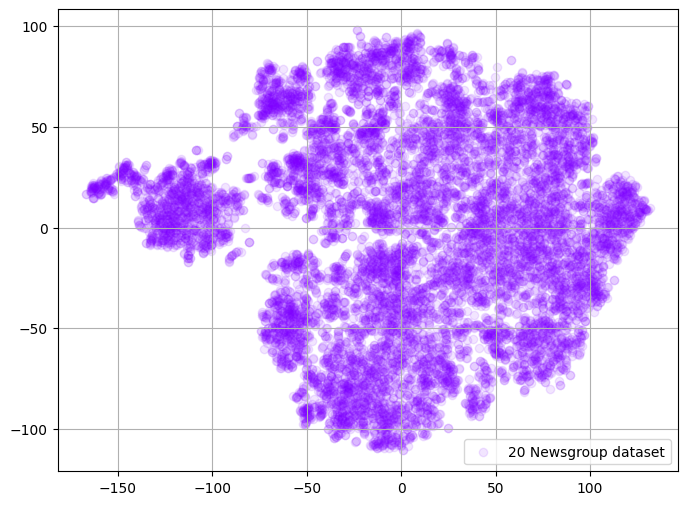

In [ ]:
# Visualize learned word embedding space using t-SNE
words_20ng = []
embeddings_20ng = []
for word in list(w2v_model.wv.index_to_key):
    embeddings_20ng.append(w2v_model.wv[word])
    words_20ng.append(word)

embeddings_20ng = np.array(embeddings_20ng)  # Convert to NumPy array

tsne_w2v_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_w2v_2d = tsne_w2v_2d.fit_transform(embeddings_20ng)


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(8, 6))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("tsne_plot.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('20 Newsgroup dataset', embeddings_w2v_2d, a=0.1)

In [30]:
#Metrics Evaluation
'''
Inertia: Inertia measures the sum of squared distances between each data point and its nearest centroid.
A lower inertia indicates that the clusters are more compact and well-separated.
In your case, an inertia of 2932.53 means that, on average, the data points are relatively far from their assigned cluster centroids, indicating potentially less optimal clustering.

Silhouette Score: The silhouette score measures how similar an object is to its own cluster compared to other clusters.
The score ranges from -1 to 1, where a higher value indicates better clustering.
A score of 0.139 suggests that the clustering is not well-separated, with data points having overlapping characteristics with other clusters.

Davies-Bouldin Index: The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.
A lower value indicates better clustering. With a value of 1.914, it suggests that the clusters are not well-separated, and there may be some overlap between clusters.

Calinski-Harabasz Index: The Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion.
A higher value indicates better clustering. With a value of 852.46, it suggests that the clusters are not well-separated and may not be very distinct from each other.
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(word_vectors)

# Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Silhouette Score
silhouette = silhouette_score(word_vectors, clusters)
print("Silhouette Score:", silhouette)

# Davies-Bouldin Index
db_index = davies_bouldin_score(word_vectors, clusters)
print("Davies-Bouldin Index:", db_index)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(word_vectors, clusters)
print("Calinski-Harabasz Index:", ch_index)


Inertia: 2932.525146484375
Silhouette Score: 0.13931328
Davies-Bouldin Index: 1.9143625406896472
Calinski-Harabasz Index: 852.4567089996469


In [36]:
#Bag-Of-Words document representation method

from copy import deepcopy
# Converting words in list to plain text
Vocab_v3 = deepcopy(Vocab_v1)
from itertools import chain
for i in range(0, len(Vocab_v3)):
    data = Vocab_v3[i]
    Vocab_v3[i] = " ".join(str(i) for i in chain(data))

# Generate the bow vectors for the corpus
from sklearn.feature_extraction.text import CountVectorizer
# Initialize an instance of count Vectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(Vocab_v3)

# print shape of the sparse matrix
print(X_counts.shape)
# normalise existing X_counts
from sklearn import preprocessing
X_Norm = preprocessing.normalize(X_counts)

# transforming dataset matrix using SVD
from sklearn.decomposition import TruncatedSVD
# Getting no of components
no_components = 500
print("Number of components: %d" %(no_components))

#Fitting the SVD class
trun_svd1 =  TruncatedSVD(n_components = no_components)
X_transformed = trun_svd1.fit_transform(X_Norm)

# Printing the transformed matrix shape
print("Transformed Matrix:")
print(X_transformed.shape)

# Using this csr sparse matrix, we will perform clustering
from sklearn.cluster import KMeans
import statistics
from sklearn.metrics import normalized_mutual_info_score as NMI
kmeans_bow = KMeans(n_clusters=20)
idx_bow, nmis_bow = [], []
for i in range(3):
    # run K-means
    kmeans_bow.fit_predict(X_transformed)
    # idx.append(the obtained clustering labels)
    idx_bow.append(kmeans_bow.labels_)
    # nmi.append(nmi_score(gnd, clustering label))
    nmis_bow.append(NMI(gnd_labels, kmeans_bow.labels_))

# report mean and std values of nmis
mean = sum(nmis_bow) / len(nmis_bow)
print("NMI mean for K-means: %f" %mean)
variance = sum([((x - mean) ** 2) for x in nmis_bow]) / len(nmis_bow)
std = variance ** 0.5
# Printing result
print("NMI std for BoW K-means: " + str(std))

(18846, 134383)
Number of components: 1000
Transformed Matrix:
(18846, 1000)
NMI mean for K-means: 0.124921
NMI std for BoW K-means: 0.018523455901645416


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM model using the cluster labels obtained from K-means
svm_model = SVC()
svm_model.fit(X_transformed, idx_bow[0])  # Assuming idx_bow[0] contains the K-means cluster labels

# Predict labels using SVM model
svm_pred_labels = svm_model.predict(X_transformed)

# Evaluate metrics
accuracy = accuracy_score(gnd_labels, svm_pred_labels)
precision = precision_score(gnd_labels, svm_pred_labels, average='weighted')
recall = recall_score(gnd_labels, svm_pred_labels, average='weighted')
f1 = f1_score(gnd_labels, svm_pred_labels, average='weighted')

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)


Accuracy: 4.255544943224026
Precision: 4.304088199933158
Recall: 4.255544943224026
F1 Score: 2.8229807148329744


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[

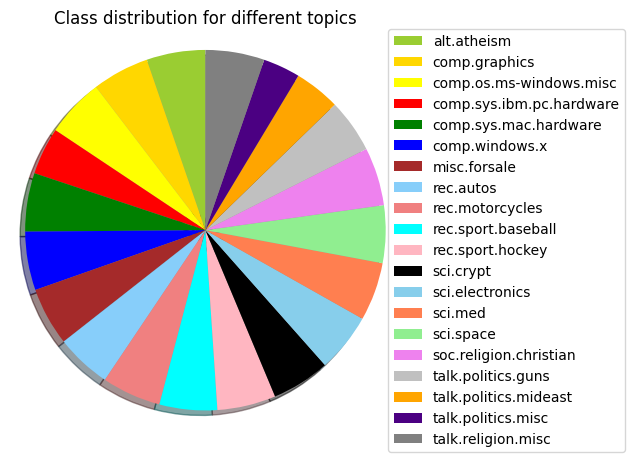

18846
['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
Training model...


Total time: 14.62364411354065 secs
(50,)
(18846, 134383)
Number of components: 500
Transformed Matrix:
(18846, 500)
NMI mean for K-means: 0.126604
NMI std for BoW K-means: 0.010940530094391623
Accuracy: 4.080441472991616
Precision: 3.0936526988253137
Recall: 4.080441472991616
F1 Score: 3.032580679228041


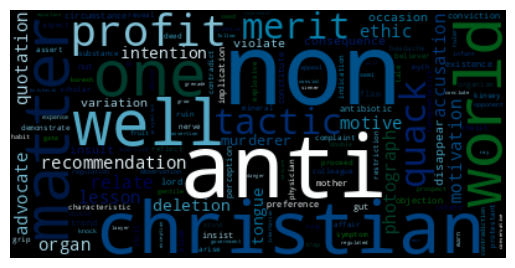

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from gensim.models import word2vec #Library
from sklearn.neighbors import KDTree #For KNN
from sklearn.cluster import KMeans
import time
import pandas as pd
from itertools import cycle
from wordcloud import WordCloud
from sklearn.manifold import TSNE
import matplotlib.cm as cm

# Fetching the raw data from the 20newsgroup corpora
raw_dataset = fetch_20newsgroups()
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

# Filtering out the content to analyze the document
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target # Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)

# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# Plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts = plt.pie(val,colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')
plt.show()

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# Verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])

# Train the Word2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
num_features = 50 # Dimensionality of the hidden layer representation
min_word_count = 20 # Minimum word count to keep a word in the vocabulary
context = 5 # Context window size (on each side)
downsampling = 1e-3 # Downsample setting for frequent words

# Initialize and train the model
print("Training model...");
w2v_model = word2vec.Word2Vec(Vocab_v1, vector_size=num_features, min_count=min_word_count, window=context, sample=downsampling)
w2v_model.init_sims(replace=True); # Make the model more memory efficient by normalizing the vectors in-place
model_name = "model_full_20newsGroup";
w2v_model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

word_vectors = w2v_model.wv.vectors
print(word_vectors[0].shape)
# Print word vector for the first word: 100-element vector with values
word_vectors[0]

# Print length of word vectors
len(word_vectors)

# Cluster the words using KMeans
num_clusters = 20 # 20 topics
# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans(n_clusters=num_clusters)
clusters = kmeans_clustering.fit_predict(word_vectors)
centers = kmeans_clustering.cluster_centers_
centroid_map = dict(zip(w2v_model.wv.index_to_key, clusters))

# Get words in each cluster that are closest to the cluster center
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    # Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    # Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    # A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index + 1
    return df

# Get the top words and print the first 2 in each cluster:
top_words = get_top_words(w2v_model.wv.index_to_key, 5000, centers, word_vectors)
top_words[:5]

# Create a word cloud with the words of a cluster and print and save them.
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

# Call on each cluster, and pass in a different color scheme in each iteration to distinguish them.
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(0, 20):
    col = next(cmaps)
    display_cloud(i, col)

#Bag-Of-Words document representation method

from copy import deepcopy
# Converting words in list to plain text
Vocab_v3 = deepcopy(Vocab_v1)
from itertools import chain
for i in range(0, len(Vocab_v3)):
    data = Vocab_v3[i]
    Vocab_v3[i] = " ".join(str(i) for i in chain(data))

# Generate the bow vectors for the corpus
from sklearn.feature_extraction.text import CountVectorizer
# Initialize an instance of count Vectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(Vocab_v3)

# print shape of the sparse matrix
print(X_counts.shape)
# normalise existing X_counts
from sklearn import preprocessing
X_Norm = preprocessing.normalize(X_counts)

# transforming dataset matrix using SVD
from sklearn.decomposition import TruncatedSVD
# Getting no of components
no_components = 500
print("Number of components: %d" %(no_components))

#Fitting the SVD class
trun_svd1 =  TruncatedSVD(n_components = no_components)
X_transformed = trun_svd1.fit_transform(X_Norm)

# Printing the transformed matrix shape
print("Transformed Matrix:")
print(X_transformed.shape)

# Using this csr sparse matrix, we will perform clustering
from sklearn.cluster import KMeans
import statistics
from sklearn.metrics import normalized_mutual_info_score as NMI
kmeans_bow = KMeans(n_clusters=20)
idx_bow, nmis_bow = [], []
for i in range(3):
    # run K-means
    kmeans_bow.fit_predict(X_transformed)
    # idx.append(the obtained clustering labels)
    idx_bow.append(kmeans_bow.labels_)
    # nmi.append(nmi_score(gnd, clustering label))
    nmis_bow.append(NMI(gnd_labels, kmeans_bow.labels_))

# report mean and std values of nmis
mean = sum(nmis_bow) / len(nmis_bow)
print("NMI mean for K-means: %f" %mean)
variance = sum([((x - mean) ** 2) for x in nmis_bow]) / len(nmis_bow)
std = variance ** 0.5
# Printing result
print("NMI std for BoW K-means: " + str(std))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM model using the cluster labels obtained from K-means
svm_model = SVC()
svm_model.fit(X_transformed, idx_bow[0])  # Assuming idx_bow[0] contains the K-means cluster labels

# Predict labels using SVM model
svm_pred_labels = svm_model.predict(X_transformed)

# Evaluate metrics
accuracy = accuracy_score(gnd_labels, svm_pred_labels)
precision = precision_score(gnd_labels, svm_pred_labels, average='weighted')
recall = recall_score(gnd_labels, svm_pred_labels, average='weighted')
f1 = f1_score(gnd_labels, svm_pred_labels, average='weighted')

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from gensim.models import word2vec #Library
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fetching the raw data from the 20newsgroup corpora
raw_dataset = fetch_20newsgroups()
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

# Filtering out the content to analyze the document
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target # Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)

# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# Plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts = plt.pie(val,colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')
#plt.show()

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remove digits and one-character word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

# Preprocess all the documents in the corpus
processed_docs = list(pre_processing(corpus))

# Train the Word2Vec model on the cleaned sentences to get an idea of word vectors
word2vec_model = word2vec.Word2Vec(processed_docs, vector_size=100, window=5, min_count=1, workers=4)

# Perform dimensionality reduction using TruncatedSVD
num_topics = 20
X_transformed = word2vec_model.wv.vectors

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_topics)
kmeans_labels = kmeans.fit_predict(X_transformed)


# Train SVM model using the cluster labels obtained from KMeans
svm_model = SVC()
svm_model.fit(X_transformed, kmeans_labels)

# Predict labels using SVM model
svm_pred_labels = svm_model.predict(X_transformed)

# Evaluate metrics
accuracy = accuracy_score(gnd_labels, svm_pred_labels)
precision = precision_score(gnd_labels, svm_pred_labels, average='weighted')
recall = recall_score(gnd_labels, svm_pred_labels, average='weighted')
f1 = f1_score(gnd_labels, svm_pred_labels, average='weighted')

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[